# Tarea 2: Laboratorio I

#### Integrantes: Benjamín Ignacio Ayala Baeza, María Ignacia Espinoza Inzunza, Florencia Andrea Fuentes Jara, Martín Andrés Sepúlveda Zúñiga

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.stats import norm

#### Para comenzar, debemos notar que nos piden el mismo procedimiento para diversos casos, de forma que para facilitar el trabajo definiremos a continuacion una serie de funciones para realizar lo solicitado 

### Funcion para los Graficos 

In [349]:
def graph(data, name):
    letra= range(len(data))
    plt.plot(letra, data, color ="lightsteelblue") #, s=8
    plt.xlabel('Número Medición')
    plt.ylabel('Aceleración z')
    plt.title(name)


### Funcion para los Histogramas

In [350]:
def hist(data, name):
    plt.hist(data, bins=20)
    plt.xlabel("Aceleracion z")
    plt.ylabel('Veces repetidas')
    plt.title(name)

### Funcion para el Ajuste

In [351]:
def model(x, a, b, c):  #modelo=función del ajuste
    return a * np.exp(-b * (x - c)**2)

def data_to_counts(data, bins=20): # convierte la repetición de datos en una curva
    y_data, bin_edges = np.histogram(data, bins=bins) #y_data= n° de repéticionrs de un dato
    x_data = (bin_edges[1:] + bin_edges[0:-1])/2 #promedio de los bordes # x_data= posición de lw mitaad de barra
    
    return x_data, y_data

def ajuste(model, data, seed=None, bins=20):
        
    x_data, y_data = data_to_counts(data, bins=bins)
    
    if seed is None:
        seed = [max(y_data), np.std(data), np.mean(x_data)]
        print(max(y_data))
    
    fit = curve_fit(model, x_data, y_data, p0=seed) #ajuste

    return fit[0] #parametros ajuste

def plot_ajuste(model, parametros, data, bins=20):
    x_data, y_data = data_to_counts(data, bins=bins)
    plt.hist(data, bins=bins, label='data')
    plt.plot(x_data, model(x_data, *parametros), 'r', label="model")
    plt.legend(loc='best')
    
#Comó llamar a la función:
    #parametros = ajuste(model, datos_mesa, [1000, 1, 9.8])
    #plot_ajuste(model, parametros, datos_mesa)

### Funcion para los Residuos

In [352]:
def residuos(model, parametros, data):
    x_data, y_data = data_to_counts(data)
    y_model = model(x_data, *parametros)
    
    return y_data - y_model

#Comó llamar a la función:
    #res = residuos(model, parametros, datos_mesa)
    #plt.scatter(x_data, res)

# Caso 1: Datos sobre Mesa

### Gráfico de los Datos 

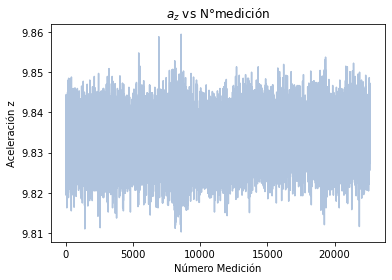

In [353]:
datos_mesa = np.genfromtxt("datos_mesa.csv",skip_header=3000 ,skip_footer=5000, usecols=(3)) 
graph(datos_mesa,'$a_z$ vs N°medición')

###  Valor medio y Desviación Estándar

In [354]:
# Valor medio de los datos
V = np.mean(datos_mesa)
# Desviación Estándar
D = np.std(datos_mesa)

print("El valor medio de los datos es " + str(V) + " y la desviación estándar " + str(D))

El valor medio de los datos es 9.83315441758581 y la desviación estándar 0.00562260808427642


### Histograma de los Datos

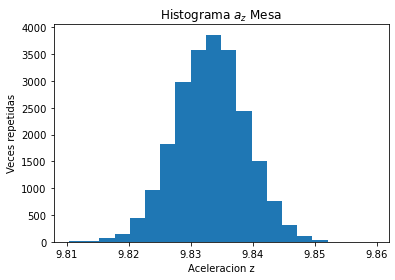

In [355]:
hist(datos_mesa,"Histograma $a_z$ Mesa")

### Ajuste de los Datos

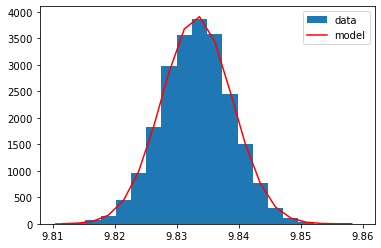

In [356]:
parametros = ajuste(model, datos_mesa, [1000, 1, 9.8])
plot_ajuste(model, parametros, datos_mesa)

### Residuos del Ajuste

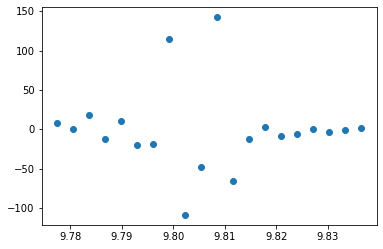

In [357]:
res = residuos(model, parametros, datos_mesa)
plt.scatter(x_data, res)

### Analisis del Residuo

Visualmente podemos apreciar como hay una tendencia hacia el $9.81$ cuando nos acercamos tanto como por el lado izquierdo como por el lado derecho. En todo caso, vemos que el valor en el eje $y$ cuando se llega al punto $9.81$ se dispara, rompe con esta tendencia. Analiticamente estamos viendo los restos producidos entre el histograma y su ajuste, ese disparo que vemos cercano al $9.81$ corresponde a la gran diferencia en funcion a la cantidad de datos que tenemos con ese valor, por otro lado el valor negativo de los valores cercanos a $9.81$ nos indica la diferencia de cantidad de datos comparado con el ajuste en dicho valor, de forma que nos dice no hay una buena correlacion entre el ajuste con los datos indicando. Concluyendo no podemos decir que el ajuste realizado no es el ajuste correcto debido a la carencia de tendencia en el grafico de los residuos.

# Caso 2: Datos sobre Mano

### Gráfico: 

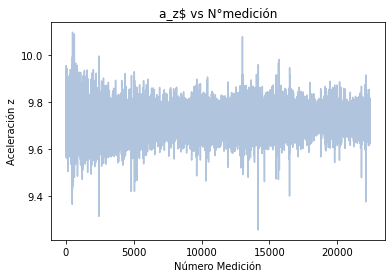

In [358]:
datos_mano = np.genfromtxt("datos_mano.csv",skip_header=1000 ,skip_footer=1000, usecols=(3)) 
graph(datos_mano,'a_z$ vs N°medición')

### Valor Medio y Desviación Estandar

In [359]:
# Valor medio de los datos
V = np.mean(datos_mano)
# Desviación Estándar
D = np.std(datos_mano)

print("El valor medio de los datos es " + str(V) + " y la desviación estándar " + str(D))

El valor medio de los datos es 9.724885525701565 y la desviación estándar 0.058081506086687794


### Histograma de los Datos

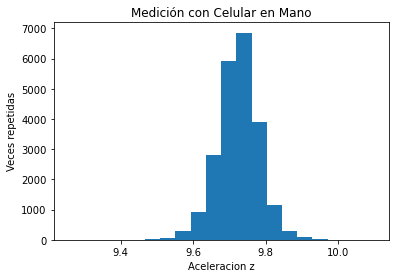

In [360]:
hist(datos_mano,'Medición con Celular en Mano')

### Ajuste de los Datos

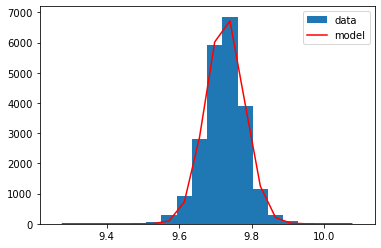

In [361]:
parametros = ajuste(model, datos_mano, [1000, 1, 9.8])
plot_ajuste(model, parametros, datos_mano)

### Residuos del Ajuste

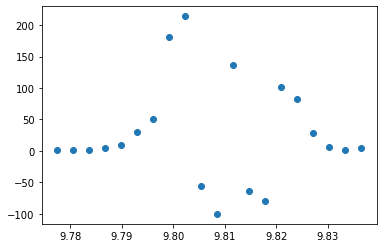

In [362]:
res = residuos(model, parametros, datos_mano)
plt.scatter(x_data, res)

### Analisis del Residuo

En este otro caso podemos apreciar que los valores negativos, aquellos que nos entregan una diferencia entre la cantidad de datos y el del valor del ajuste, son cercanos a cero, indicandonos así una mejor cercanía entre el valor de los datos y el ajuste. Concluyendo no podemos decir que el ajuste realizado no es el ajuste correcto debido a la carencia de tendencia en el grafico de los residuos.

# Caso 3: Datos bajo Frecuencia

### Gráfico: 

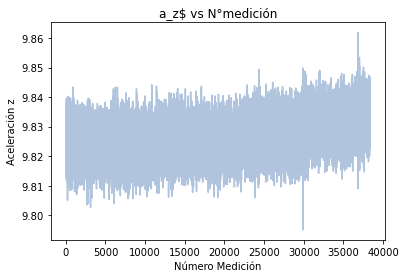

In [363]:
datos_fre = np.genfromtxt("datos_frecuencia.csv",skip_header=1000 ,skip_footer=1000, usecols=(3)) 
#Asi hemos obtenido los datos eliminando los primeros 10000 y utilizando la funcion graph, haremos:
graph(datos_fre ,'a_z$ vs N°medición')

### Valor Medio y Desviación Estandar

In [364]:
# Valor medio de los datos
V = np.mean(datos_fre)
# Desviación Estándar
D = np.std(datos_fre)

print("El valor medio de los datos es " + str(V) + " y la desviación estándar " + str(D))

El valor medio de los datos es 9.826347738555956 y la desviación estándar 0.00614548886189054


### Histograma de los Datos

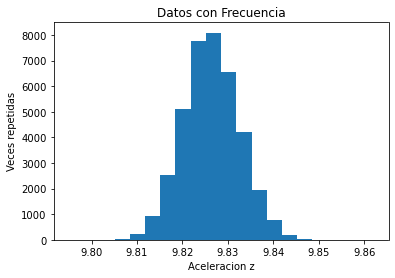

In [365]:
#para obtener el histograma, ocuparemos la funcion hist definida previamente obteniendo:
hist(datos_fre, 'Datos con Frecuencia')

### Ajuste del Histograma

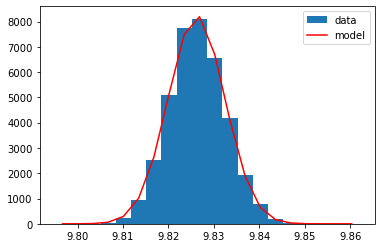

In [366]:
parametros = ajuste(model, datos_fre, [1000, np.std(datos_fre), 9.82])
plot_ajuste(model, parametros, datos_fre)

### Residuos del Ajuste

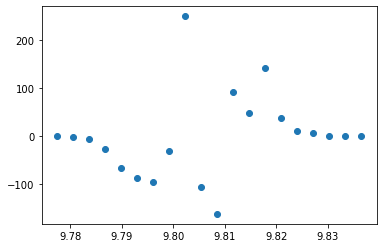

In [367]:
res = residuos(model, parametros, datos_fre)
plt.scatter(x_data, res)

### Analisis del Residuo

De misma forma que en el Caso 2, los valores del residuo son bastantes cercanos al 0, indicando cercania entre el valor del ajuste y demases, ademas de que estos se dispersan de una manera seudamente lineal. Vemos que no tenemos un concentracion tipo cumulo en algun dato pero si la tendencia al desorden en el $9.81$ tal como esta la concentración en el histograma. Concluyendo no podemos decir que el ajuste realizado no es el ajuste correcto debido a la carencia de tendencia en el grafico de los residuos.